# POST-requests 1

Consider a POST request like logging into a wikipedia account using python

In [1]:
import requests

In [2]:
url = 'https://ru.wikipedia.org/w/index.php?title=%D0%A1%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F:%D0%92%D1%85%D0%BE%D0%B4&returnto=%D0%97%D0%B0%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D0%B0%D1%8F+%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B8%D1%86%D0%B0'

In [3]:
headers = {'Upgrade-Insecure-Requests': '1',
           'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',
           'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
           'Accept-Language': 'ru-RU,ru;q=0.9,en-US;q=0.8,en;q=0.7',
           'Accept-Encoding': 'gzip, deflate, br'}

In [4]:
user = 'Matveydatascraping'

In [5]:
with open('password.txt', 'r') as f:
    password = f.read().strip()

In [6]:
data = {'wpName': user,
        'wpPassword': password}

In [7]:
response = requests.post(url, 
                         headers=headers, 
                         data=data)

print(response.status_code)

200


Did I login? How can we check it?

In [8]:
with open('response.html', 'w') as f:
    f.write(response.text)

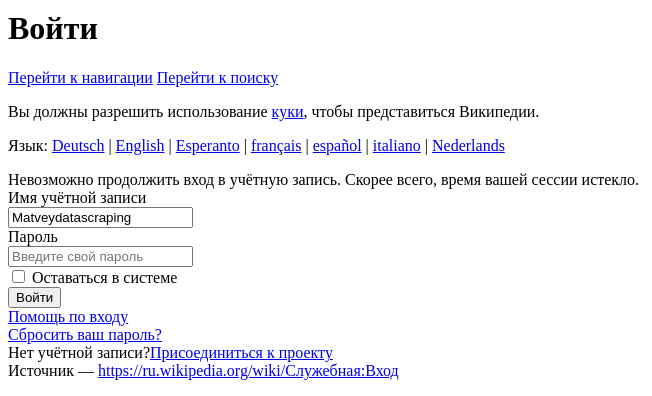

**This is not exactly what we expected to get. Let's fix it.**

In [9]:
response = requests.get(url)
print(response.status_code)

200


In [10]:
from bs4 import BeautifulSoup

In [11]:
soup = BeautifulSoup(response.text)

In [12]:
hidden_inputs = soup.find_all('form')[0]\
                    .find_all('input', {"type": "hidden"})

In [13]:
for el in hidden_inputs:
    try:
        data[el['name']] = el['value']
    except KeyError:
        data[el['name']] = ''

In [14]:
response = requests.post(url, 
                         headers=headers, 
                         data=data)

print(response.status_code)

200


In [15]:
with open('response.html', 'w') as f:
    f.write(response.text)

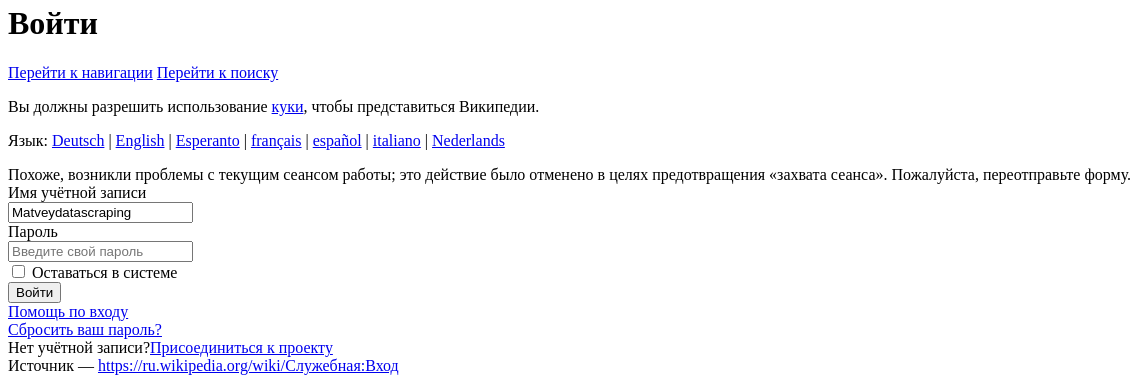

<br>
<br>
<br>

**We can see that I still don't loggin, but I got a new message here.**

Here we come to the new concept of cookies.

In [16]:
response = requests.get(url)
print(response.status_code)

200


In [17]:
hidden_inputs = soup.find_all('form')[0]\
                    .find_all('input', {"type": "hidden"})

In [18]:
for el in hidden_inputs:
    try:
        data[el['name']] = el['value']
    except KeyError:
        data[el['name']] = ''

In [19]:
# response.cookies
response = requests.post(url, 
                         headers=headers, 
                         data=data,
                         cookies=response.cookies)

print(response.status_code)

200


In [20]:
with open('response.html', 'w') as f:
    f.write(response.text)

<br>
<br>
<br>

Actualy we can know about our history of http requests, like:

In [21]:
# response.history
# response.history[0].url

<br>
<br>
<br>

**We can forget about cookies, because requests modules allow us to forget about them, because it has a special tool called 'sessions'.**

In [22]:
session = requests.session()

In [23]:
# session already got cookies inside of it
response = session.get(url)
print(response.status_code)

200


In [24]:
soup = BeautifulSoup(response.text)

In [25]:
hidden_inputs = soup.find_all('form')[0]\
                    .find_all('input', {"type": "hidden"})

In [26]:
for el in hidden_inputs:
    try:
        data[el['name']] = el['value']
    except KeyError:
        data[el['name']] = ''

In [27]:
#thanks for 'sessions' we can delete from parameters 'cookies'
response = session.post(url, 
                         headers=headers, 
                         data=data)

print(response.status_code)

200


In [28]:
with open('response.html', 'w') as f:
    f.write(response.text)

**We successfully logging and didn't care about cookies here.**